In [1]:
# creating a classification dataset with sklearn

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt


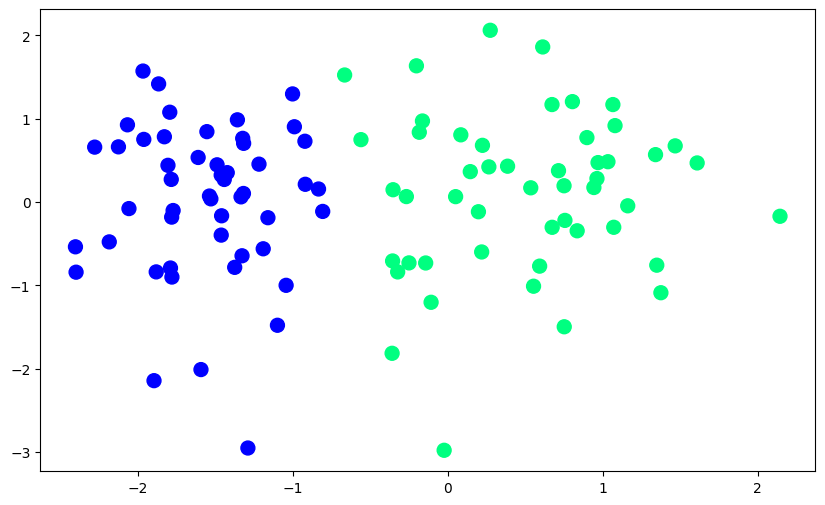

In [3]:
# plotting the dataset
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

- so its a 2d dataset with 100 samples, 2 features, and 2 classes
- the dataset is linearly separable

In [4]:
def step(z):
    return 1 if z>0 else 0 # step function that returns 1 if z is greater than 0 else 0

In [5]:

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1) # adding bias term in front of the features x
    weights = np.ones(X.shape[1]) # create an array of ones for weights whose shape  is same as column x so we had 2 columns in x  then we added bias term so it becomes 3 columns so x shape is 3
    lr = 0.1 # initializing learning rate with 0.1
    
    for i in range(1000): # started a loop for 1000 iterations
        j = np.random.randint(0,100) # random index from 0 to 99
        step = lambda x: 1 if x >= 0 else 0 # step function
        y_hat = step(np.dot(X[j],weights)) # calculating the predicted value by taking dot product of x and weights and passing it through step function
        weights = weights + lr*(y[j]-y_hat)*X[j] # updating the weights using perceptron learning rule
        
    return weights[0],weights[1:] # returning the bias term and weights that we have learned from the training data set so we can use it for prediction later 

In [ ]:
intercept_,coef_ = perceptron(X,y) #getting the intercept and coefficients from the perceptron function


In [7]:
print(coef_)
print(intercept_)

[1.32069253 0.1006124 ]
1.0


In [11]:

# to get yhee plot we calculate the slope and y-intercept of the line
# slope (m) is calculated as -coef_[0]/coef_[1] and y-intercept (b) is calculated as -intercept_/coef_[1]
# where coef_[0] is the coefficient of the bias term and coef_[1] is the coefficient of the first feature in X
# intercept_ is the intercept term returned by the perceptron function


m = -(coef_[0]/coef_[1]) # calculating the slope of the line
b = -(intercept_/coef_[1]) # calculating the y-intercept of the line

In [12]:

x_input = np.linspace(-3,3,100) # generating 100 points between -3 and 3 for x-axis
y_input = m*x_input + b # calculating the corresponding y values using the slope and y-intercept

(-3.0, 2.0)

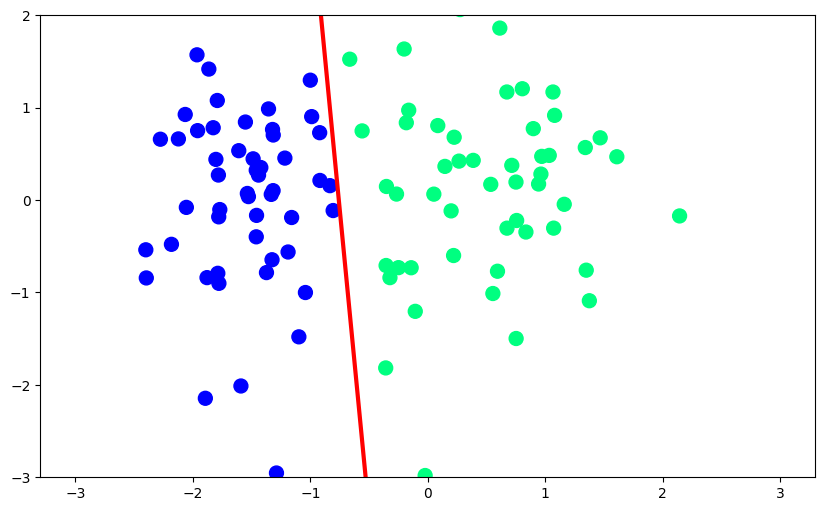

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)